In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
sampled_df = pd.read_csv('sampled_df.csv')

In [3]:
sampled_df = sampled_df[['v_call_heavy', 'd_call_heavy', 'j_call_heavy', 'sequence_alignment_aa_light', 'sequence_alignment_aa_heavy', 'ANARCI_status_light', 'ANARCI_status_heavy']]

In [4]:
sampled_df

,v_call_heavy,d_call_heavy,j_call_heavy,sequence_alignment_aa_light,sequence_alignment_aa_heavy,ANARCI_status_light,ANARCI_status_heavy
0,IGHV1-46*01,IGHD6-13*01,IGHJ4*02,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSHYLHWVRQAPGQGLE...,|||||,"|Deletions: 10, 73||||"
1,IGHV3-30*02,IGHD2-15*01,IGHJ6*03,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,QVQLVESGGGVVQPGGSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
2,IGHV4-34*01,IGHD3-22*01,IGHJ4*02,EIVMTQSPATLSVSPGERATLSCRASQSVSSNLAWYQQKPGQAPRL...,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,|||||,"|Deletions: 10, 73||||"
3,IGHV3-48*03,IGHD3-22*01,IGHJ4*02,QSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYEMNWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
4,IGHV1-18*01,IGHD4-17*01,IGHJ4*02,EIVLTQSPDFQSVTPKEKVTITCRASQSIGSSLHWYQQKPDQSPKL...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTNYGISWVRQAPGQGLE...,|||||,"|Deletions: 10, 73||||"
5,IGHV4-39*01,IGHD1-1*01,IGHJ4*02,QSVLTQPPSVSGAPGQRVTISCTGSTSNLGADFDVQWYRQTPGEVP...,QLQLQESGPGLVKPSETLSLTCSVSGGAIGESSAYWSWIRQAPGKG...,|||||,"|Deletions: 10, 73||||"
6,IGHV1-24*01,IGHD1-26*01,IGHJ6*02,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYTLTELSMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
7,IGHV4-38-2*01,IGHD4-17*01,IGHJ4*02,EIVMTQSPATLSVSPGERATLSCRASQSVSSNLAWYQQKPGQAPRL...,QVQLQESGPGLVKPSETLSLTCAVSGYSISSGYYWGWIRQPPGKGL...,|||||,"|Deletions: 10, 73||||"
8,IGHV1-69*09,IGHD2-15*01,IGHJ6*03,QSVLTQPPSASGTPGQRVTISCSGTNSNIGRNTVNWYQQLPGTAPK...,QVQLVQSGSEVKKPGSSVKVSCEASGGTFSSFAINWVRQAPGQGPE...,|||||,"|Deletions: 10, 73, 127, 128|||Shorter than IM..."
9,IGHV4-4*07,IGHD3-10*01,IGHJ3*02,DIQMTQSPSTLSASVGDRVTITCRASQSISSWLAWYQQKPGKAPKL...,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPAGKGLE...,|||||,"|Deletions: 10, 73||||"


one hot encode

In [13]:
def one_hot_encode_seq(df, column):
    #Output a df with a specific columns that want to get dummies in
    
    #label_encode
    le = LabelEncoder()
    le.fit(df[column])
    integer_encoded_letters_arry = le.transform(df[column])
    
    #append
    integer_encoded_letters_series = pd.Series(integer_encoded_letters_arry)
    df['integer_encoded_letters'] = integer_encoded_letters_series
    
    #one hot encode
    df_dummies = pd.get_dummies(df, prefix = ['integer_encoded_letters'], columns = ['integer_encoded_letters'], drop_first = True)
    return df_dummies

In [18]:
def physchemvh_gen(df, column):
    alph = np.array(sorted('ACDEFGHIKLMNPQRSTVWY'))
    residue_info = pd.read_csv("residue_dict_copy.csv", header = 0, index_col = 0)
    res_counts = pd.DataFrame(index = alph)
    df = df.set_index(column)
    for i in df.index:
        characters = pd.Series(list(i))
        res_counts = pd.concat([res_counts, characters.value_counts()], axis = 1, ignore_index = False)
    res_counts.fillna(0, inplace = True)
    res_counts = res_counts.T
    hydrophobicity = []    
    for column in res_counts:
        hydros = []
        for index, row in res_counts.iterrows():
            hydros.append(row[column]*residue_info.loc[column, 'Hydropathy Score'])
        hydrophobicity.append(hydros)
    hydrophobicity = pd.DataFrame(hydrophobicity).T
    #hydrophobicity['ave'] = hydrophobicity.sum(axis = 1)/115
    hydrophobicity['ave'] = hydrophobicity.mean(axis = 1)
    res_counts['Hydro'] = res_counts['A'] +  res_counts['I'] +  res_counts['L']+  res_counts['F']+  res_counts['V']
    res_counts['Amph'] = res_counts['W'] +  res_counts['Y']+  res_counts['M']
    res_counts['Polar'] = res_counts['Q'] +  res_counts['N'] + res_counts['S'] +  res_counts['T'] +  res_counts['C']+  res_counts['M']
    res_counts['Charged'] =  res_counts['R'] +  res_counts['K'] + res_counts['D'] +  res_counts['E'] +  res_counts['H']
    res_counts.reset_index(drop = True, inplace = True)
    physchemvh = pd.concat([res_counts, hydrophobicity['ave']], axis = 1, ignore_index = False)
    return physchemvh

In [17]:
#heavy
X_heavy = physchemvh_gen(sampled_df, 'sequence_alignment_aa_heavy')

In [18]:
X_heavy

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,7.0,2.0,4.0,4.0,4.0,14.0,3.0,3.0,5.0,8.0,...,15.0,13.0,10.0,4.0,8.0,32.0,15.0,42.0,22.0,-2.035
1,8.0,4.0,6.0,4.0,4.0,17.0,1.0,3.0,6.0,9.0,...,15.0,8.0,11.0,5.0,12.0,35.0,20.0,39.0,25.0,-2.240
2,7.0,2.0,3.0,3.0,3.0,12.0,3.0,4.0,5.0,10.0,...,19.0,9.0,8.0,5.0,10.0,32.0,15.0,41.0,18.0,-2.220
3,8.0,2.0,5.0,5.0,3.0,13.0,0.0,3.0,4.0,10.0,...,17.0,6.0,9.0,3.0,9.0,33.0,14.0,36.0,19.0,-1.295
4,7.0,2.0,7.0,3.0,4.0,12.0,1.0,2.0,5.0,6.0,...,12.0,12.0,10.0,4.0,9.0,29.0,16.0,40.0,23.0,-3.115
5,7.0,2.0,2.0,6.0,4.0,11.0,0.0,4.0,2.0,12.0,...,23.0,11.0,6.0,6.0,5.0,33.0,13.0,48.0,18.0,-1.790
6,8.0,2.0,6.0,8.0,2.0,13.0,1.0,1.0,6.0,7.0,...,11.0,14.0,12.0,3.0,10.0,30.0,18.0,40.0,25.0,-2.495
7,6.0,2.0,3.0,3.0,2.0,11.0,1.0,5.0,5.0,10.0,...,20.0,12.0,10.0,4.0,9.0,33.0,13.0,42.0,14.0,-0.525
8,9.0,4.0,4.0,5.0,3.0,11.0,2.0,4.0,6.0,5.0,...,19.0,9.0,13.0,3.0,7.0,34.0,13.0,46.0,25.0,-2.560
9,6.0,2.0,4.0,3.0,2.0,14.0,2.0,5.0,5.0,9.0,...,19.0,11.0,10.0,5.0,7.0,32.0,15.0,45.0,20.0,-1.755


In [50]:
#light
X_light = physchemvh_gen(sampled_df, 'sequence_alignment_aa_light')

In [51]:
#normalization

def normalize(df):
    for i in df:
        df[i] = (df[i] - df[i].min())/ (df[i].max() - df[i].min())
    return df

In [52]:
X_heavy_normalize = normalize(X_heavy)
X_heavy_normalize

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,0.416667,0.0,0.333333,0.428571,0.6,0.785714,1.000000,0.285714,0.571429,0.444444,...,0.3750,0.636364,0.636364,0.6,0.333333,0.689655,0.533333,0.727273,0.6875,0.360601
1,0.500000,1.0,0.666667,0.428571,0.6,1.000000,0.333333,0.285714,0.714286,0.555556,...,0.3750,0.181818,0.727273,0.8,0.666667,0.793103,0.866667,0.590909,0.8750,0.292154
2,0.416667,0.0,0.166667,0.285714,0.4,0.642857,1.000000,0.428571,0.571429,0.666667,...,0.6250,0.272727,0.454545,0.8,0.500000,0.689655,0.533333,0.681818,0.4375,0.298831
3,0.500000,0.0,0.500000,0.571429,0.4,0.714286,0.000000,0.285714,0.428571,0.666667,...,0.5000,0.000000,0.545455,0.4,0.416667,0.724138,0.466667,0.454545,0.5000,0.607679
4,0.416667,0.0,0.833333,0.285714,0.6,0.642857,0.333333,0.142857,0.571429,0.222222,...,0.1875,0.545455,0.636364,0.6,0.416667,0.586207,0.600000,0.636364,0.7500,0.000000
5,0.416667,0.0,0.000000,0.714286,0.6,0.571429,0.000000,0.428571,0.142857,0.888889,...,0.8750,0.454545,0.272727,1.0,0.083333,0.724138,0.400000,1.000000,0.4375,0.442404
6,0.500000,0.0,0.666667,1.000000,0.2,0.714286,0.333333,0.000000,0.714286,0.333333,...,0.1250,0.727273,0.818182,0.4,0.500000,0.620690,0.733333,0.636364,0.8750,0.207012
7,0.333333,0.0,0.166667,0.285714,0.2,0.571429,0.333333,0.571429,0.571429,0.666667,...,0.6875,0.545455,0.636364,0.6,0.416667,0.724138,0.400000,0.727273,0.1875,0.864775
8,0.583333,1.0,0.333333,0.571429,0.4,0.571429,0.666667,0.428571,0.714286,0.111111,...,0.6250,0.272727,0.909091,0.4,0.250000,0.758621,0.400000,0.909091,0.8750,0.185309
9,0.333333,0.0,0.333333,0.285714,0.2,0.785714,0.666667,0.571429,0.571429,0.555556,...,0.6250,0.454545,0.636364,0.8,0.250000,0.689655,0.533333,0.863636,0.5625,0.454090


In [53]:
X_light_normalize = normalize(X_light)

In [26]:
#find the best clustering


# def best_num_cluster_elbow(X, num_of_cluster, elbow = True, silhouette = False):
#     #Elbow Method
#     if elbow == True:
#         Sum_of_squared_distances = []
#         #100 or less
#         K = range(1, num_of_cluster)
#         for num_clusters in K :
#             kmeans = KMeans(n_clusters=num_clusters, random_state = 48)
#             kmeans.fit(X)
#             Sum_of_squared_distances.append(kmeans.inertia_)
#     return K, Sum_of_squared_distances


#         plt.plot(K,Sum_of_squared_distances,'bx-')
#         plt.xlabel('Values of K') 
#         plt.ylabel('Sum of squared distances/Inertia') 
#         plt.title('Elbow Method For Optimal k')
#         plt.show()
        
#     if silhouette == True:
#         #Silhouette
        
#         #100 or less
#         range_n_clusters = range(2, num_of_cluster)
#         silhouette_avg = []
#         for num_clusters in range_n_clusters:
#              # initialise kmeans
#             kmeans = KMeans(n_clusters=num_clusters, random_state = 48)
#             kmeans.fit(X)
#             cluster_labels = kmeans.labels_

#             # silhouette score
#             silhouette_avg.append(silhouette_score(X, cluster_labels))
#     return range_n_clusters, silhouette_avg
# #         plt.plot(range_n_clusters,silhouette_avg,'bx-')
# #         plt.xlabel('Values of K') 
# #         plt.ylabel('Silhouette score') 
# #         plt.title('Silhouette analysis For Optimal k')
# #         plt.show()

def best_num_cluster_elbow(X, num_of_cluster, elbow = True): #"""be sure to use the scaled data for X, Elbow Method"""
    if elbow == True:
        Sum_of_squared_distances = []
        #100 or less
        K = range(1, num_of_cluster)
        for num_clusters in K :
            kmeans = KMeans(n_clusters=num_clusters, random_state = 48)
            kmeans.fit(X)
            Sum_of_squared_distances.append(kmeans.inertia_)
        clusters_df = pd.DataFrame(list(zip(K, Sum_of_squared_distances)), columns = ['K', 'Sum_of_squared_distances'])
    return clusters_df

In [37]:
def best_num_cluster_sil(X, num_of_cluster, silhouette = False):
    if silhouette == True:
        #Silhouette
        
        #100 or less
        range_n_clusters = range(2, num_of_cluster)
        silhouette_avg = []
        for num_clusters in range_n_clusters:
             # initialise kmeans
            kmeans = KMeans(n_clusters=num_clusters, random_state = 48)
            kmeans.fit(X)
            cluster_labels = kmeans.labels_

            # silhouette score
            silhouette_avg.append(silhouette_score(X, cluster_labels))
    return range_n_clusters, silhouette_avg
#         plt.plot(range_n_clusters,silhouette_avg,'bx-')
#         plt.xlabel('Values of K') 
#         plt.ylabel('Silhouette score') 
#         plt.title('Silhouette analysis For Optimal k')
#         plt.show()

In [3]:
#best number of cluster for heavy
# best_num_cluster(X_heavy_normalize, 31)

In [4]:
#best number of cluster for heavy
# best_num_cluster(X_light_normalize, 31)

In [5]:
#best cluster for heavy == 9
# kmeans_1 = KMeans(n_clusters=9).fit(X_heavy_normalize)
# cluster_labels = kmeans_1.labels_
# X_heavy_normalize['cluster'] = cluster_labels
# X_heavy_normalize

In [6]:
#best cluster for light == 16
# kmeans_2 = KMeans(n_clusters=9).fit(X_light_normalize)
# cluster_labels = kmeans_2.labels_
# X_light_normalize['cluster'] = cluster_labels
# X_light_normalize

In [74]:
#PCA for heavy
X = X_heavy_normalize.drop(columns = 'cluster')
y = X_heavy_normalize['cluster']
pca = PCA()
Xt = pca.fit_transform(X)

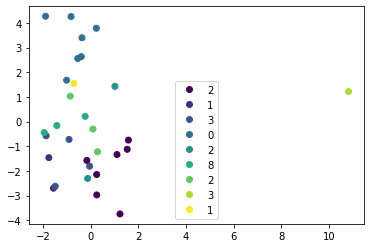

In [75]:
#plot pca
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(y))
plt.show()

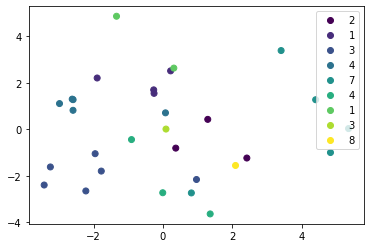

In [76]:
#PCA for light

X = X_light_normalize.drop(columns = 'cluster')
y = X_light_normalize['cluster']
pca = PCA()
Xt = pca.fit_transform(X)

#plot pca
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(y))
plt.show()

## Example 2, 1000 datasets

In [12]:
sampled_df2 = pd.read_csv('sampled_df_1000.csv')

In [13]:
sampled_df2 = sampled_df2[['v_call_heavy', 'd_call_heavy', 'j_call_heavy', 'sequence_alignment_aa_light', 'sequence_alignment_aa_heavy', 'ANARCI_status_light', 'ANARCI_status_heavy']]

In [14]:
sampled_df2

,v_call_heavy,d_call_heavy,j_call_heavy,sequence_alignment_aa_light,sequence_alignment_aa_heavy,ANARCI_status_light,ANARCI_status_heavy
0,IGHV3-23*01,IGHD3-10*01,IGHJ4*02,EVVLTQSPATLSLSPGERVTLSCRASQSISNYLAWYQQKPGQAPRL...,EVQLLESGGGFMQPGVSPRLSCTASGFTFSSYTMSWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
1,IGHV1-2*02,IGHD5-18*01,IGHJ3*02,EIVMTQSPATLSVSPGERATLSCRASQSVSSNLAWYQQKPGQAPRL...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...,|||||,"|Deletions: 10, 73||||"
2,IGHV3-23*01,IGHD4-17*01,IGHJ6*03,QSALTQPASVSGSPGQSITISCTGTSSDVGSYNLVSWYQQHPGKAP...,EVQLLESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
3,IGHV3-7*03,IGHD2-15*01,IGHJ4*02,DVVMTQSPLSLPVTLGQPASISCRSSVTLVYSDGDTYLNWFQQRPG...,EVQLVESGGGLVQPGGSLKLSCVASGFTFSSYWMSWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
4,IGHV3-30*18,IGHD4-4*01,IGHJ4*02,QSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
...,...,...,...,...,...,...,...
995,IGHV1-3*01,IGHD2-21*02,IGHJ4*02,DIVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,|||||,"|Deletions: 10, 73||||"
996,IGHV3-43D*04,IGHD6-19*01,IGHJ6*03,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,EVQLVESGGVVVQPGGSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
997,IGHV3-9*01,IGHD2-15*01,IGHJ1*01,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
998,IGHV3-33*01,NaN,IGHJ6*02,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNYVYWYQQLPGTAPK...,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"


In [19]:
heavy_2 = physchemvh_gen(sampled_df2, 'sequence_alignment_aa_heavy')
heavy_2

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,6.0,3.0,4.0,5.0,7.0,13.0,1.0,2.0,4.0,9.0,...,22.0,9.0,7.0,3.0,7.0,31.0,13.0,46.0,19.0,-1.770
1,11.0,2.0,5.0,3.0,4.0,17.0,1.0,3.0,5.0,5.0,...,12.0,10.0,10.0,5.0,9.0,33.0,19.0,40.0,21.0,-2.255
2,9.0,2.0,4.0,4.0,3.0,14.0,0.0,2.0,5.0,10.0,...,17.0,9.0,10.0,3.0,11.0,34.0,17.0,38.0,18.0,-1.035
3,7.0,4.0,6.0,6.0,5.0,17.0,0.0,4.0,5.0,9.0,...,16.0,5.0,11.0,5.0,7.0,36.0,14.0,37.0,22.0,-1.005
4,8.0,2.0,5.0,4.0,4.0,13.0,1.0,3.0,5.0,9.0,...,14.0,9.0,12.0,3.0,8.0,36.0,13.0,37.0,21.0,-1.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,2.0,2.0,4.0,2.0,12.0,1.0,2.0,6.0,5.0,...,13.0,11.0,11.0,4.0,7.0,30.0,14.0,40.0,20.0,-2.395
996,9.0,2.0,8.0,4.0,3.0,14.0,1.0,2.0,5.0,9.0,...,14.0,7.0,11.0,4.0,10.0,34.0,17.0,33.0,23.0,-1.665
997,9.0,2.0,6.0,5.0,4.0,14.0,2.0,3.0,4.0,11.0,...,14.0,7.0,8.0,4.0,6.0,35.0,12.0,35.0,24.0,-1.990
998,9.0,2.0,6.0,4.0,3.0,14.0,1.0,2.0,4.0,7.0,...,13.0,7.0,12.0,4.0,8.0,33.0,15.0,35.0,22.0,-1.855


In [20]:
light_2 = physchemvh_gen(sampled_df2, 'sequence_alignment_aa_light')

In [21]:
#StandardScaler 
scaler = StandardScaler()

In [22]:
scaler_heavy_df = pd.DataFrame(scaler.fit_transform(heavy_2), columns = heavy_2.columns)

In [23]:
scaler_heavy_df

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,-0.780204,1.347135,-0.684760,0.865683,3.120527,-0.110850,0.234166,-1.095760,-0.705671,0.149943,...,1.658493,-0.157516,-1.794668,-1.192291,-0.541776,-0.772207,-0.584673,1.559495,-0.369397,-0.227600
1,1.551547,-0.358099,-0.019298,-0.810373,0.608699,1.816978,0.234166,-0.472815,0.045043,-1.760153,...,-1.456633,0.202109,0.076727,1.057315,0.331352,-0.091248,1.721730,0.002336,0.274713,-0.913143
2,0.618847,-0.358099,-0.684760,0.027655,-0.228576,0.371107,-0.972877,-1.095760,0.045043,0.627467,...,0.100930,-0.157516,0.076727,-1.192291,1.204480,0.249231,0.952929,-0.516717,-0.691452,0.811315
3,-0.313854,3.052368,0.646163,1.703711,1.445975,1.816978,-0.972877,0.150130,0.045043,0.149943,...,-0.210582,-1.596015,0.700526,1.057315,-0.541776,0.930190,-0.200273,-0.776244,0.596768,0.853720
4,0.152497,-0.358099,-0.019298,0.027655,0.608699,-0.110850,0.234166,-0.472815,0.045043,0.149943,...,-0.833607,-0.157516,1.324324,-1.192291,-0.105212,0.930190,-0.584673,-0.776244,0.274713,0.556887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.085197,-0.358099,-2.015682,0.027655,-1.065852,-0.592807,0.234166,-1.095760,0.795756,-1.760153,...,-1.145120,0.561734,0.700526,-0.067488,-0.541776,-1.112687,-0.200273,0.002336,-0.047342,-1.111031
996,0.618847,-0.358099,1.977085,0.027655,-0.228576,0.371107,0.234166,-1.095760,0.045043,0.149943,...,-0.833607,-0.876765,0.700526,-0.067488,0.767916,0.249231,0.952929,-1.814350,0.918823,-0.079184
997,0.618847,-0.358099,0.646163,0.865683,0.608699,0.371107,1.441209,-0.472815,-0.705671,1.104991,...,-0.833607,-0.876765,-1.170870,-0.067488,-0.978340,0.589710,-0.969074,-1.295297,1.240878,-0.538568
998,0.618847,-0.358099,0.646163,0.027655,-0.228576,0.371107,0.234166,-1.095760,-0.705671,-0.805105,...,-1.145120,-0.876765,1.324324,-0.067488,-0.105212,-0.091248,0.184128,-1.295297,0.596768,-0.347747


In [24]:
scaler_light_df = pd.DataFrame(scaler.fit_transform(light_2), columns = light_2.columns)

In [27]:
lst_heavy = best_num_cluster_elbow(scaler_heavy_df, 10)

In [28]:
lst_heavy

,K,Sum_of_squared_distances
0,1,25000.000000
1,2,20680.674680
2,3,18215.382020
3,4,17176.411101
4,5,16267.288399
5,6,15398.936000
6,7,14868.239051
7,8,14393.695787
8,9,13951.253868


In [30]:
# plt.plot(lst_heavy[0],lst_heavy[1],'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Sum of squared distances/Inertia') 
# plt.title('Elbow Method For Optimal k')
# plt.show()
        

In [50]:
lst_heavy_sil = best_num_cluster_sil(scaler_heavy_df, 10, silhouette = True)

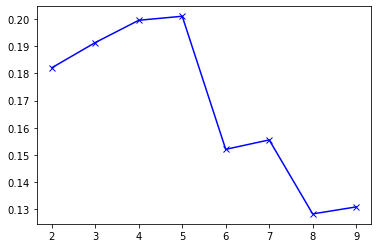

In [51]:
plt.plot(lst_heavy_sil[0], lst_heavy_sil[1], 'bx-')

In [67]:
 def final_kmean_cluster(data, best_cluster, random_state = 48):
    # find the final k_mean cluster after knowing the best cluster for the given data
    #be sure to use scaled data
        kmeans = KMeans(n_clusters = best_cluster, random_state = None).fit(data)
        cluster_labels = kmeans.labels_
        data['cluster'] = cluster_labels
        return data

In [69]:
kmean_1000 = final_kmean_cluster(scaler_heavy_df, 5)
kmean_1000

,A,C,D,E,F,G,H,I,K,L,...,T,V,W,Y,Hydro,Amph,Polar,Charged,ave,cluster
0,-0.780204,1.347135,-0.684760,0.865683,3.120527,-0.110850,0.234166,-1.095760,-0.705671,0.149943,...,-0.157516,-1.794668,-1.192291,-0.541776,-0.772207,-0.584673,1.559495,-0.369397,-0.227600,2
1,1.551547,-0.358099,-0.019298,-0.810373,0.608699,1.816978,0.234166,-0.472815,0.045043,-1.760153,...,0.202109,0.076727,1.057315,0.331352,-0.091248,1.721730,0.002336,0.274713,-0.913143,1
2,0.618847,-0.358099,-0.684760,0.027655,-0.228576,0.371107,-0.972877,-1.095760,0.045043,0.627467,...,-0.157516,0.076727,-1.192291,1.204480,0.249231,0.952929,-0.516717,-0.691452,0.811315,2
3,-0.313854,3.052368,0.646163,1.703711,1.445975,1.816978,-0.972877,0.150130,0.045043,0.149943,...,-1.596015,0.700526,1.057315,-0.541776,0.930190,-0.200273,-0.776244,0.596768,0.853720,0
4,0.152497,-0.358099,-0.019298,0.027655,0.608699,-0.110850,0.234166,-0.472815,0.045043,0.149943,...,-0.157516,1.324324,-1.192291,-0.105212,0.930190,-0.584673,-0.776244,0.274713,0.556887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.085197,-0.358099,-2.015682,0.027655,-1.065852,-0.592807,0.234166,-1.095760,0.795756,-1.760153,...,0.561734,0.700526,-0.067488,-0.541776,-1.112687,-0.200273,0.002336,-0.047342,-1.111031,1
996,0.618847,-0.358099,1.977085,0.027655,-0.228576,0.371107,0.234166,-1.095760,0.045043,0.149943,...,-0.876765,0.700526,-0.067488,0.767916,0.249231,0.952929,-1.814350,0.918823,-0.079184,0
997,0.618847,-0.358099,0.646163,0.865683,0.608699,0.371107,1.441209,-0.472815,-0.705671,1.104991,...,-0.876765,-1.170870,-0.067488,-0.978340,0.589710,-0.969074,-1.295297,1.240878,-0.538568,0
998,0.618847,-0.358099,0.646163,0.027655,-0.228576,0.371107,0.234166,-1.095760,-0.705671,-0.805105,...,-0.876765,1.324324,-0.067488,-0.105212,-0.091248,0.184128,-1.295297,0.596768,-0.347747,0


In [71]:
def pca_analysis(df_pc_encode, df_meta, annotate_col):
          #Standard scale
        oscale = StandardScaler()
          # Use fit and transform method
        oscale.fit(df_pc_encode.values)
        encode_scale_data= oscale.transform(df_pc_encode.values)
                  
          #PCA analysis
        opca = PCA(n_components=2)
        opca.fit(encode_scale_data)          
        x = opca.transform(encode_scale_data)
        df_pcs = pd.DataFrame(x, columns = ["PC1", "PC2"])

          #"Merge PCs with annotation data""”

        df_pcs_meta = df_pcs.join(df_meta, how="inner")
        df_pcs_meta["newcol"] = df_pcs_meta[annotate_col].apply(lambda row: row.split("-")[0] \
                                                                                      .split('S')[0]\
                                                                                      .split('D')[0]\
                                                                                      .split('*')[0])
                 

        df_pcs_meta = df_pcs_meta.sort_values("newcol")
        return df_pcs_meta

In [81]:
pca1 = pca_analysis(kmean_1000, sampled_df2[['v_call_heavy']] , 'v_call_heavy')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

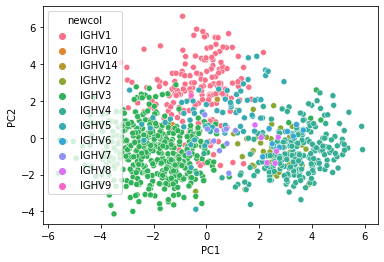

In [82]:
sns.scatterplot(data = pca1, x = 'PC1', y = 'PC2', hue = 'newcol')

In [87]:
best_num_cluster(scaler_light_df, 100)

(range(1, 100),
 [25000.0,
  21146.758218228002,
  18297.858644379303,
  16692.64777800602,
  15298.445617845518,
  14347.439503479662,
  13515.176990466674,
  12899.348486429308,
  12270.267116564126,
  11839.545458258897,
  11470.450523461339,
  11046.199490121551,
  10691.502398502394,
  10289.318722145088,
  9991.384419707461,
  9850.21736932961,
  9509.568311089828,
  9338.516800867148,
  8896.066571988882,
  8709.698685012972,
  8629.232060781467,
  8237.390345478652,
  8211.510734172136,
  7956.024218746676,
  7729.298400375446,
  7629.48179782192,
  7526.636411519889,
  7341.797012936419,
  7355.727553599832,
  7189.468099125177,
  7068.428144363785,
  6933.463024805132,
  6995.978554521657,
  6882.04259527405,
  6631.487698805205,
  6621.484473040628,
  6564.773686136639,
  6484.638831835244,
  6470.587730868767,
  6309.613831395627,
  6426.8345494248115,
  6239.276338139826,
  6186.829016913094,
  6088.478894921374,
  6070.2952173203375,
  5931.818670188229,
  5887.9086916004

In [ ]:
def final_kmean_cluster(data, best_cluster, random_sample = 48):
    # find the final k_mean cluster after knowing the best cluster for the given data
    #be sure to use scaled data
    kmeans = KMeans(n_clusters = best_cluster).fit(data)
    cluster_labels = kmeans.labels_
    data['cluster'] = cluster_labels
    return data

In [ ]:
final_kmean_cluster()